# Advanced data visualisation with matplotlib

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("QueryResults.csv")

In [3]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [6]:
new_df = df.rename(columns={"m":"DATE","TagName":"TAG","Unnamed: 2":"POSTS"})

In [7]:
new_df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2700,2024-10-01 00:00:00,php,732
2701,2024-10-01 00:00:00,python,3778
2702,2024-10-01 00:00:00,r,831
2703,2024-10-01 00:00:00,ruby,64


In [10]:
new_df.shape

(2705, 3)

In [12]:
new_df.count()

DATE     2705
TAG      2705
POSTS    2705
dtype: int64

In [26]:
adf = new_df.groupby("TAG").sum()

C:\Users\a127014\AppData\Local\Temp\ipykernel_14644\1386182925.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  adf = new_df.groupby("TAG").sum()


In [25]:
adf.sort_values(by="POSTS", ascending=False)

,POSTS
TAG,
javascript,2532273
python,2207987
java,1918761
c#,1622339
php,1467552
c++,811628
r,509412
c,406522
swift,335493


In [27]:
date_df = new_df.groupby("DATE")

In [29]:
date_df.count()

,TAG,POSTS
DATE,,
2008-07-01 00:00:00,1,1
2008-08-01 00:00:00,11,11
2008-09-01 00:00:00,12,12
2008-10-01 00:00:00,11,11
2008-11-01 00:00:00,12,12
...,...,...
2024-06-01 00:00:00,14,14
2024-07-01 00:00:00,14,14
2024-08-01 00:00:00,14,14


# Solution from tutor 

In order to look at the number of entries and the number of posts by programming language, we need to make use of the .groupby() method. The key is combining .groupby() with the TAG column, which holds as our categories (the names of the programming languages).

In [34]:
new_df.groupby("TAG").sum()

C:\Users\a127014\AppData\Local\Temp\ipykernel_14644\785186468.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby("TAG").sum()


,POSTS
TAG,
assembly,44817
c,406522
c#,1622339
c++,811628
delphi,52251
go,73929
java,1918761
javascript,2532273
perl,68239


In [36]:
new_df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,195,195
c,195,195
c#,196,196
c++,195,195
delphi,195,195
go,180,180
java,195,195
javascript,195,195
perl,195,195


In [39]:
new_df["DATE"][0]

'2008-07-01 00:00:00'

## Data Cleaning: Working with Time Stamps

Let's take a closer look at the 'DATE' column in our DataFrame. We can use the double square bracket notation to look at the second entry in the column: 

In [40]:
type(new_df["DATE"][0])

str

Let's use Pandas' to_datetime() to convert the entire df['DATE'] column.

In [43]:
new_df.DATE = pd.to_datetime(new_df.DATE)

In [44]:
new_df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


In [46]:
df_pivot = new_df.pivot(index="DATE",columns="TAG", values="POSTS")

In [47]:
df_pivot.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

Examine the head and the tail of the DataFrame. What does it look like?

Print out the column names.

Count the number of entries per column.

In [48]:
df_pivot.shape

(196, 14)

In [49]:
df_pivot.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-06-01,86.0,532.0,1928.0,1059.0,67.0,223.0,1669.0,2928.0,29.0,946.0,5027.0,1086.0,108.0,575.0
2024-07-01,91.0,557.0,2094.0,1129.0,54.0,250.0,1529.0,2892.0,34.0,865.0,5232.0,1057.0,93.0,577.0
2024-08-01,114.0,483.0,1853.0,1031.0,84.0,209.0,1211.0,2511.0,42.0,809.0,4534.0,879.0,106.0,548.0
2024-09-01,87.0,448.0,1569.0,991.0,67.0,155.0,1275.0,2173.0,26.0,607.0,3720.0,750.0,83.0,516.0
2024-10-01,97.0,474.0,1707.0,1016.0,94.0,189.0,1627.0,2064.0,23.0,732.0,3778.0,831.0,64.0,505.0


In [53]:
df_pivot.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Count the number of entries per column.


In [57]:
df_pivot.count()

TAG
assembly      195
c             195
c#            196
c++           195
delphi        195
go            180
java          195
javascript    195
perl          195
php           195
python        195
r             193
ruby          195
swift         186
dtype: int64

In [58]:
df_pivot

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,86.0,532.0,1928.0,1059.0,67.0,223.0,1669.0,2928.0,29.0,946.0,5027.0,1086.0,108.0,575.0
2024-07-01,91.0,557.0,2094.0,1129.0,54.0,250.0,1529.0,2892.0,34.0,865.0,5232.0,1057.0,93.0,577.0
2024-08-01,114.0,483.0,1853.0,1031.0,84.0,209.0,1211.0,2511.0,42.0,809.0,4534.0,879.0,106.0,548.0


In [59]:
df_pivot.fillna(0, inplace=True)

In [60]:
df_pivot

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,221.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,86.0,532.0,1928.0,1059.0,67.0,223.0,1669.0,2928.0,29.0,946.0,5027.0,1086.0,108.0,575.0
2024-07-01,91.0,557.0,2094.0,1129.0,54.0,250.0,1529.0,2892.0,34.0,865.0,5232.0,1057.0,93.0,577.0
2024-08-01,114.0,483.0,1853.0,1031.0,84.0,209.0,1211.0,2511.0,42.0,809.0,4534.0,879.0,106.0,548.0


In [62]:
df_pivot.isna().values.any()

False

<Axes: title={'center': 'Popularity'}, xlabel='DATE', ylabel='Posts'>

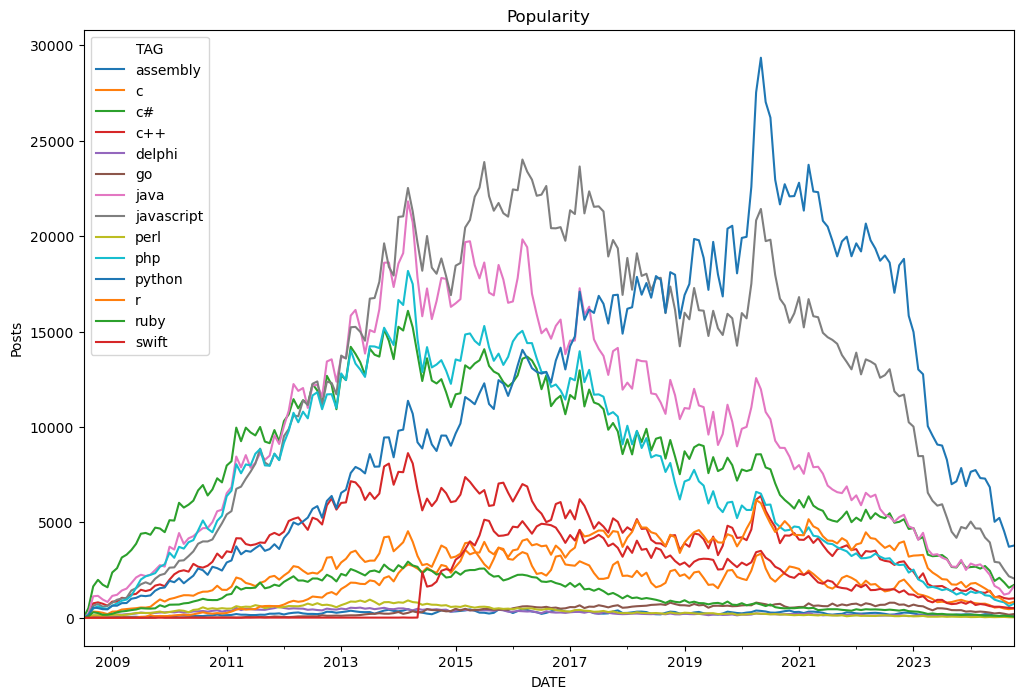

In [65]:
df_pivot.plot(kind="line", xlabel="DATE", ylabel="Posts", 
              figsize=(12, 8),
              title="Popularity")

### And for single language

In [67]:
df_python = df_pivot["python"]

In [68]:
df_python

DATE
2008-07-01       0.0
2008-08-01     119.0
2008-09-01     535.0
2008-10-01     505.0
2008-11-01     447.0
               ...  
2024-06-01    5027.0
2024-07-01    5232.0
2024-08-01    4534.0
2024-09-01    3720.0
2024-10-01    3778.0
Name: python, Length: 196, dtype: float64

<Axes: title={'center': 'Popularity'}, xlabel='DATE', ylabel='Posts'>

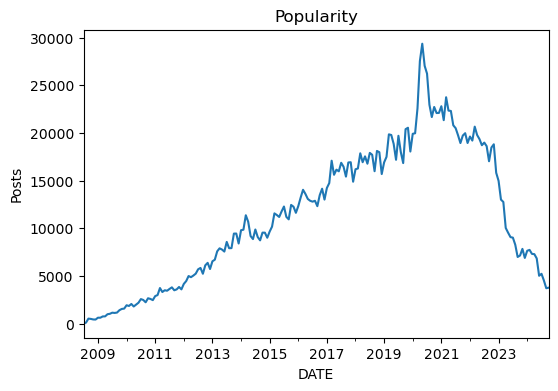

In [84]:
df_python.plot(kind="line", xlabel="DATE", ylabel="Posts", 
              figsize=(6, 4),
              title="Popularity")

### Comparing the top 5

In [71]:
df_top5 = df_pivot[["python", "javascript","java", "php", "c#"]]

In [72]:
df_top5

TAG,python,javascript,java,php,c#
DATE,,,,,
2008-07-01,0.0,0.0,0.0,0.0,3.0
2008-08-01,119.0,160.0,221.0,157.0,503.0
2008-09-01,535.0,633.0,1123.0,474.0,1640.0
2008-10-01,505.0,720.0,1146.0,603.0,1985.0
2008-11-01,447.0,581.0,954.0,497.0,1729.0
...,...,...,...,...,...
2024-06-01,5027.0,2928.0,1669.0,946.0,1928.0
2024-07-01,5232.0,2892.0,1529.0,865.0,2094.0
2024-08-01,4534.0,2511.0,1211.0,809.0,1853.0


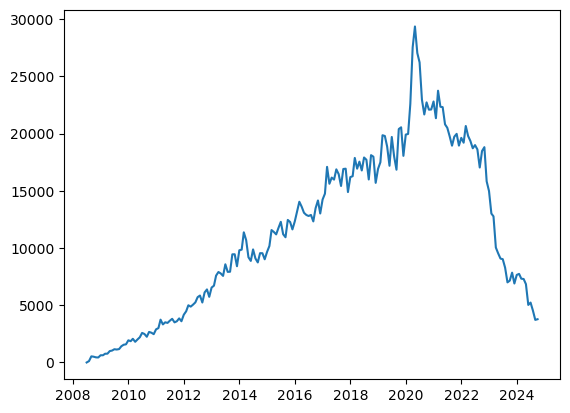

In [83]:
plt.plot(df_top5.index, df_top5["python"])

In [85]:
df_top2 = df_pivot[["python","java"]]

<Axes: title={'center': 'Popularity'}, xlabel='Year', ylabel='Posts'>

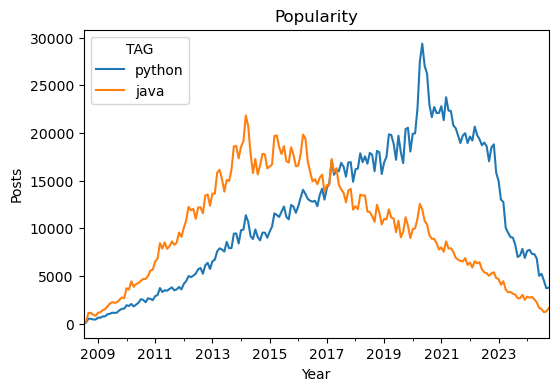

In [89]:
df_top2.plot(kind="line",xlabel="Year", ylabel="Posts", figsize=(6,4), title="Popularity")

## Smoothing out Time-series data

In [96]:
roll_df = new_df.rolling(window=6).mean()
roll_df

C:\Users\a127014\AppData\Local\Temp\ipykernel_14644\4037331663.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE', 'TAG'], dtype='object')
  roll_df = new_df.rolling(window=6).mean()


,POSTS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2700,788.166667
2701,1402.166667
2702,1509.166667
2703,1248.666667


In [92]:
new_df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
...,...,...,...
2700,2024-10-01,php,732
2701,2024-10-01,python,3778
2702,2024-10-01,r,831
2703,2024-10-01,ruby,64


In [103]:
rolled_df5 = df_top5.rolling(window=12).mean()

In [104]:
rolled_df5

TAG,python,javascript,java,php,c#
DATE,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-06-01,7337.500000,4565.333333,2659.583333,1280.666667,2687.083333
2024-07-01,7021.666667,4310.833333,2524.583333,1232.166667,2587.916667
2024-08-01,6709.750000,4082.666667,2371.750000,1174.166667,2484.416667


<Axes: xlabel='DATE'>

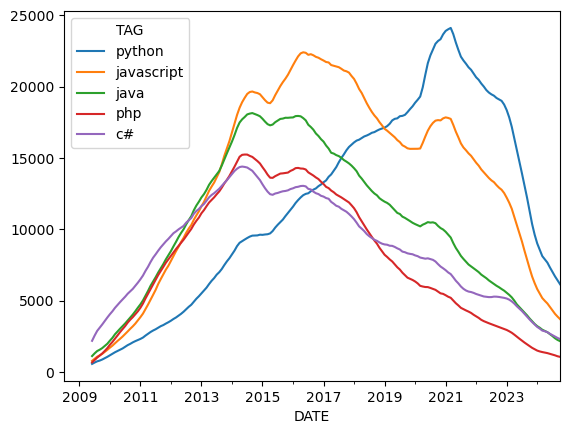

In [105]:
rolled_df5.plot(kind="line")